# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | sechura
Processing Record 3 of Set 1 | gadzhiyevo
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | aykhal
Processing Record 6 of Set 1 | keflavik
Processing Record 7 of Set 1 | kailua-kona
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | goldsboro
Processing Record 10 of Set 1 | fale old settlement
Processing Record 11 of Set 1 | shumikha
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | misratah
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | quepos
Processing Record 17 of Set 1 | kolokani
Processing Record 18 of Set 1 | savave village
City not found. Skipping...
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | boali
Processing Record 21 of Set 1 | bilibino
Processing Record 22 of Set 1 | kha

Processing Record 39 of Set 4 | haimen
Processing Record 40 of Set 4 | priozersk
Processing Record 41 of Set 4 | lubin
Processing Record 42 of Set 4 | newman
Processing Record 43 of Set 4 | betio village
Processing Record 44 of Set 4 | santa sylvina
Processing Record 45 of Set 4 | berezovyy
Processing Record 46 of Set 4 | tual
Processing Record 47 of Set 4 | nizhniy odes
Processing Record 48 of Set 4 | quesnel
Processing Record 49 of Set 4 | saint-philippe
Processing Record 0 of Set 5 | port mathurin
Processing Record 1 of Set 5 | hukumati azrah
Processing Record 2 of Set 5 | lobujya
Processing Record 3 of Set 5 | kataragama
City not found. Skipping...
Processing Record 4 of Set 5 | yangor
City not found. Skipping...
Processing Record 5 of Set 5 | brookings
Processing Record 6 of Set 5 | swan hill
Processing Record 7 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 8 of Set 5 | fada
Processing Record 9 of Set 5 | yellowknife
Processing Record 10 of Set 5 | afaahiti
Proc

Processing Record 33 of Set 8 | namibe
Processing Record 34 of Set 8 | arenapolis
Processing Record 35 of Set 8 | cabo san lucas
Processing Record 36 of Set 8 | piti village
Processing Record 37 of Set 8 | kalymnos
Processing Record 38 of Set 8 | anadyr
Processing Record 39 of Set 8 | la puebla de montalban
Processing Record 40 of Set 8 | mangrol
Processing Record 41 of Set 8 | klyuchi
Processing Record 42 of Set 8 | watampone
Processing Record 43 of Set 8 | kotido
Processing Record 44 of Set 8 | mon
Processing Record 45 of Set 8 | ruidoso
Processing Record 46 of Set 8 | santiago
Processing Record 47 of Set 8 | bel ombre
Processing Record 48 of Set 8 | beatrice
Processing Record 49 of Set 8 | kourou
Processing Record 0 of Set 9 | lebu
Processing Record 1 of Set 9 | itoman
Processing Record 2 of Set 9 | chimbote
Processing Record 3 of Set 9 | talpa de allende
Processing Record 4 of Set 9 | vernon
Processing Record 5 of Set 9 | hadibu
Processing Record 6 of Set 9 | sarkand
Processing Rec

Processing Record 22 of Set 12 | dosso
Processing Record 23 of Set 12 | callao
Processing Record 24 of Set 12 | nago
Processing Record 25 of Set 12 | ugoofaaru
Processing Record 26 of Set 12 | coahuayana de hidalgo
Processing Record 27 of Set 12 | iquitos
Processing Record 28 of Set 12 | iquique
Processing Record 29 of Set 12 | puerto leguizamo
Processing Record 30 of Set 12 | ambalangoda
Processing Record 31 of Set 12 | ialibu
Processing Record 32 of Set 12 | tubarjal
Processing Record 33 of Set 12 | wenchang
Processing Record 34 of Set 12 | dunedin
Processing Record 35 of Set 12 | nchelenge
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,70.79,57,0,12.75,PN,1686240627
1,sechura,-5.5569,-80.8222,81.01,62,99,10.47,PE,1686240627
2,gadzhiyevo,69.2551,33.3362,40.77,61,100,18.70,RU,1686240627
3,port-aux-francais,-49.3500,70.2167,41.04,67,33,18.30,TF,1686240627
4,aykhal,66.0000,111.5000,51.67,56,58,6.96,RU,1686240422


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,70.79,57,0,12.75,PN,1686240627
1,sechura,-5.5569,-80.8222,81.01,62,99,10.47,PE,1686240627
2,gadzhiyevo,69.2551,33.3362,40.77,61,100,18.70,RU,1686240627
3,port-aux-francais,-49.3500,70.2167,41.04,67,33,18.30,TF,1686240627
4,aykhal,66.0000,111.5000,51.67,56,58,6.96,RU,1686240422


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

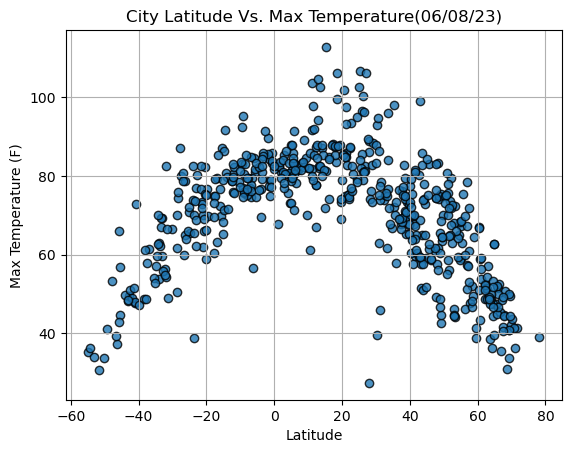

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
            edgecolor="black", linewidth=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

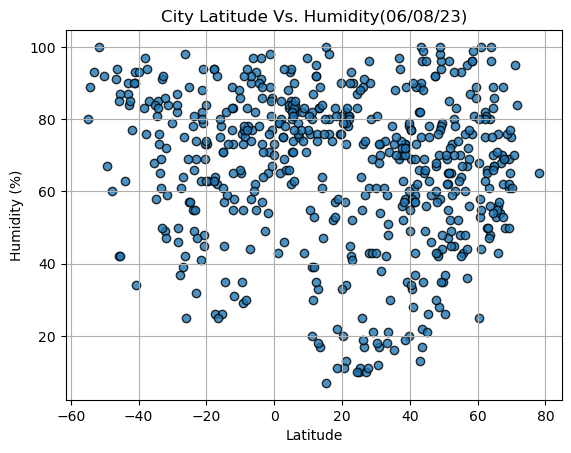

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            edgecolor="black", linewidth=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

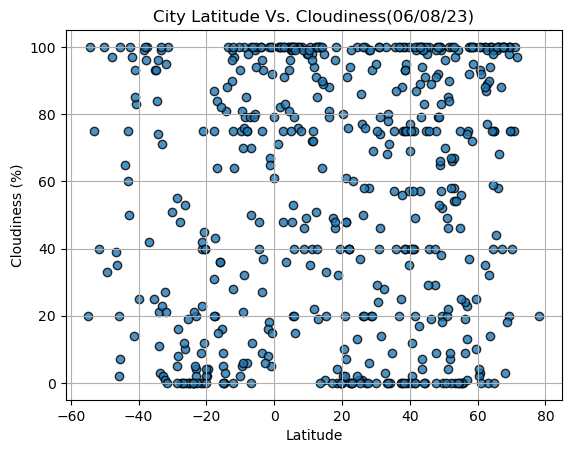

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            edgecolor="black", linewidth=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

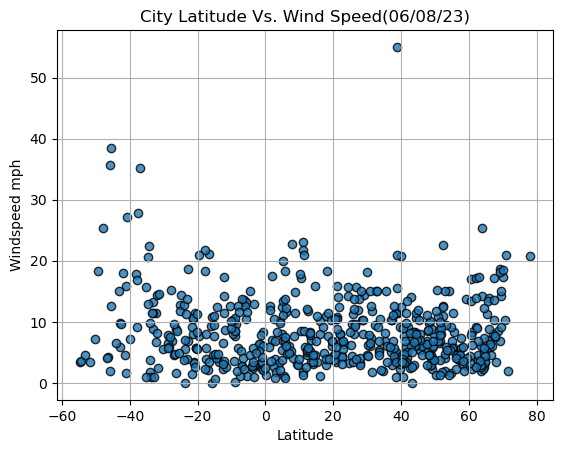

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            edgecolor="black", linewidth=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values, title, y_label, text_coordinates):
    
    # Run regression 
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title, wrap=True)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,gadzhiyevo,69.2551,33.3362,40.77,61,100,18.70,RU,1686240627
4,aykhal,66.0000,111.5000,51.67,56,58,6.96,RU,1686240422
5,keflavik,64.0049,-22.5624,48.63,100,100,25.32,IS,1686240627
6,kailua-kona,19.6406,-155.9956,73.36,90,0,5.99,US,1686240627
7,ilulissat,69.2167,-51.1000,33.82,69,20,6.91,GL,1686240628


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,70.79,57,0,12.75,PN,1686240627
1,sechura,-5.5569,-80.8222,81.01,62,99,10.47,PE,1686240627
3,port-aux-francais,-49.3500,70.2167,41.04,67,33,18.30,TF,1686240627
9,fale old settlement,-9.3852,-171.2468,83.08,76,81,9.98,TK,1686240628
11,ushuaia,-54.8000,-68.3000,35.22,80,20,3.44,AR,1686240628


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.7525626729029382


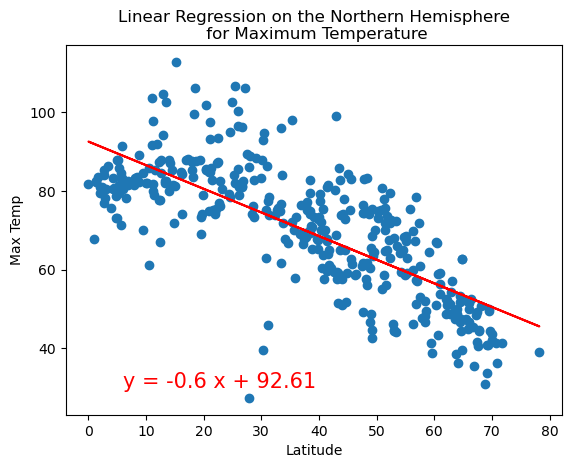

In [49]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 
                       'Max Temp',
                       (6,30))

The r-squared is: 0.8232041485778171


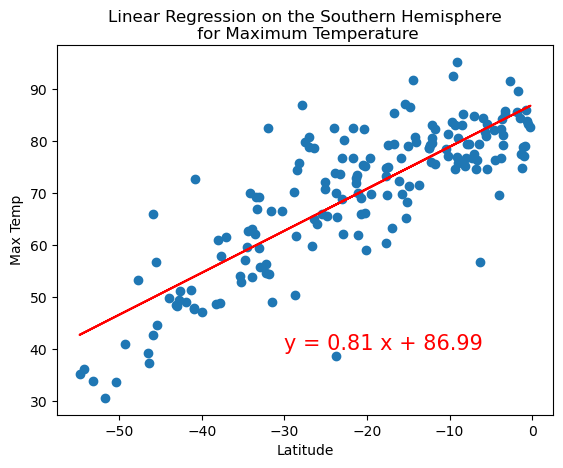

In [52]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 
                       'Max Temp',
                       (-30,40))

**Discussion about the linear relationship:** 
The linear regression on the Northern hemisphere and max temperature shows a strong negative corrrelation. 
This analysis shows that the more north we go the max temperature drops. The linear regression on the Southern hemisphere and max temperature shows the opposite trend. As the latitude increases in the southern hemisphere we see an increase in max temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.0243485636535564


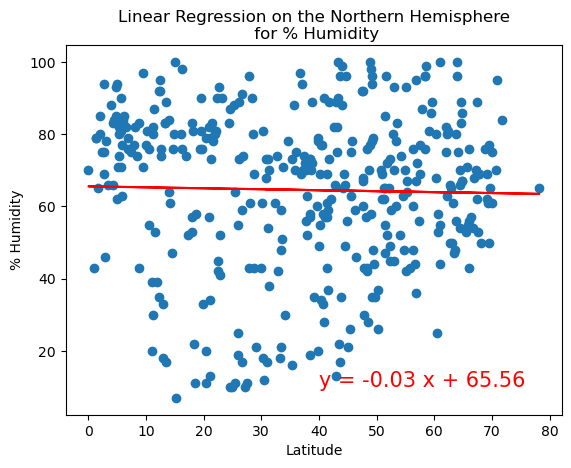

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', 
                       '% Humidity',
                       (40,10))

The r-squared is: -0.09589810491445466


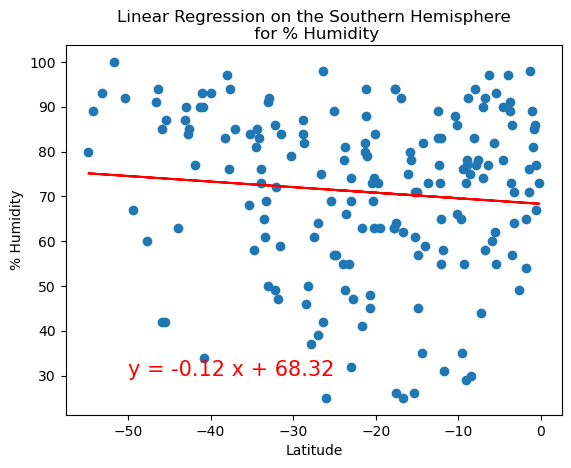

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity',
                       '% Humidity',
                       (-50,30))

**Discussion about the linear relationship:** 
The linear relationship between latitude and humidity in both hemispheres show a negative relationship. However, the r-squared value for both linear regressions are close to 0. From this we can hypothesize that the overall humidity doesnt change drastically even when latitude changes. We can conclude that there is no correlation between latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.026469208693615374


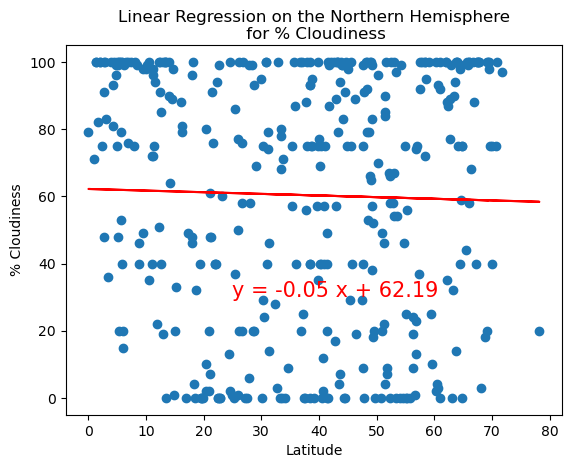

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Cloudiness',
                       '% Cloudiness',
                       (25,30))

The r-squared is: 0.04814392290543047


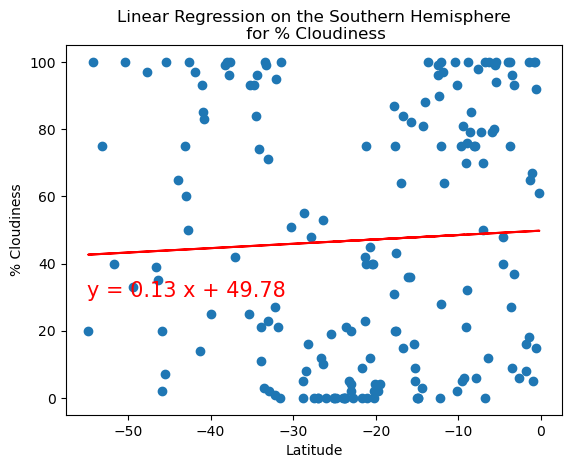

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness',
                       '% Cloudiness',
                       (-55,30))

**Discussion about the linear relationship:** 
The linear relationship between latitude and cloudiness in the north hemisphere shows a weak negative correlation. This shows that cloudiness does decrease as latitude increases but not by a lot. With a small r-squared value it can be concluded as cloudiness has not correlationship with latitude. Similarily, the southern hemisphere also has a small r-squared value. The southern hemisphere had a weak positive r-squared value which indicates low levels of correlation. We can conclude that there is no correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.000954395956216927


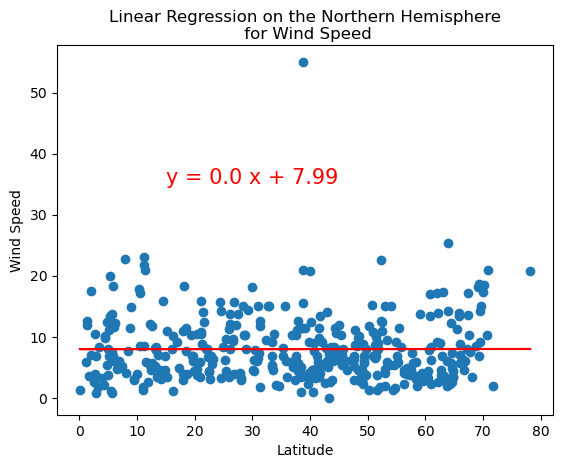

In [65]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed',
                       'Wind Speed',
                       (15,35))

The r-squared is: -0.2995353711713711


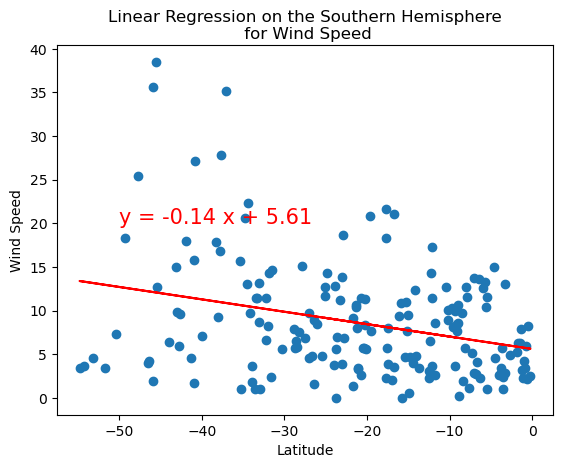

In [66]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed',
                       'Wind Speed',
                       (-50,20))

**Discussion about the linear relationship:** 
The linear regression on northern hemisphere latitude and wind speed gave us a slope and a r-squared value of 0. This indicates that there is no correlation between latitude and wind speed in the northern hemisphere. This means that in every latitude of the northern hemisphere we expect the windspeed to be equal to 7.99. In contrast, the southern hemisphere resulted in a negative correlation. As the latitude increases in the southern hemisphere the windspeed decreases. 